# Start

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [90]:
# try to parse date variables and also include the cells with space only as NA
harvard = pd.read_csv("data/Original Data/original_data_proper.csv")

# only take the baseline columns
# harvard = harvard[harvard['Assmnt'] <= 10]
# unique_patients = len(baseline_df)

# drop all values where fclinra08 is NA
harvard = harvard.dropna(subset=['fclinra08'])

C:\Users\Daniel\AppData\Local\Temp\ipykernel_26796\616534122.py:2: DtypeWarning: Columns (3,218,247,251) have mixed types. Specify dtype option on import or set low_memory=False.
  harvard = pd.read_csv("data/Original Data/original_data_proper.csv")


# Defining Questionnaires

In [91]:
# define questionnaires
baseline_self_reported = harvard.filter(regex='bclinpt')
baseline_research_assistant = harvard.filter(regex='bclinra')
follow_up_self_reported = harvard.filter(regex='fclinpt')
follow_up_self_reported = pd.concat([follow_up_self_reported, harvard.filter(regex='fclinicpt')], axis=1)
follow_up_research_assistant = harvard.filter(regex='fclinra')
demographics = harvard.filter(regex='dem0')
demographics = pd.concat([demographics, harvard.filter(regex='dem101')], axis=1)
demographics = pd.concat([demographics, harvard.filter(regex='socio')], axis=1)
demographics = pd.concat([demographics, harvard.filter(regex='Socio')], axis=1)
eligibility = harvard.filter(regex='elig')
eligibility = pd.concat([eligibility, harvard.filter(regex='Elig')], axis=1)
exact = harvard.filter(regex='exact')
exact = pd.concat([exact, harvard.filter(regex='Exact')], axis=1)
facit = harvard.filter(regex='facit')
# gac = harvard.filter(regex='GAC')
mmrc = harvard.filter(regex='mmrc')
anger_survey = harvard.filter(regex='EDANG')
anger_survey = pd.concat([anger_survey, harvard.filter(regex='PROMISAngerBankv1_SE'), harvard.filter(regex='PROMISAngerBankv1_Theta')], axis=1)
anxiety_survey = harvard.filter(regex='EDANX')
anxiety_survey = pd.concat([anxiety_survey, harvard.filter(regex='PROMISAnxietyBankv1_SE'), harvard.filter(regex='PROMISAnxietyBankv1_Theta')], axis=1)
depression_survey = harvard.filter(regex='EDDEP')
depression_survey = pd.concat([depression_survey, harvard.filter(regex='PROMISDepressionBankv1_SE'), harvard.filter(regex='PROMISDepressionBankv1_Theta')], axis=1)
fatigue_survey = harvard.filter(regex='FATIMP')
fatigue_survey  = pd.concat([fatigue_survey, harvard.filter(regex='PROMISFatigueBankv1_SE'), harvard.filter(regex='PROMISFatigueBankv1_Theta')], axis=1)
fatigue_survey = pd.concat([fatigue_survey, harvard.filter(regex='FATEX'), harvard.filter(regex='HI12_Bank'), harvard.filter(regex='HI7_Bank'), harvard.filter(regex='An\d_Bank'), harvard.filter(regex='An\d{2}_Bank')], axis=1)
globals_survey = harvard.filter(regex='Global')
globals_survey = pd.concat([globals_survey, harvard.filter(regex='GeneralHealth')], axis=1)
pain_survey = harvard.filter(regex='PAINBE')
pain_survey = pd.concat([pain_survey, harvard.filter(regex='PROMISPainBehaviorBankv1_SE'), harvard.filter(regex='PROMISPainBehaviorBankv1_Theta')], axis=1)
pain_survey = pd.concat([pain_survey, harvard.filter(regex='PAININ')], axis=1)
phy_function_survey = harvard.filter(regex='PFA')
phy_function_survey = pd.concat([phy_function_survey, harvard.filter(regex='PROMISPhyFunctionBankv1_SE'), harvard.filter(regex='PROMISPhyFunctionBankv1_Theta')], axis=1)
phy_function_survey = pd.concat([phy_function_survey, harvard.filter(regex='PFB'), harvard.filter(regex='PFC')], axis=1)
social_satisfaction_survey =  harvard.filter(regex='SRPSAT')
social_satisfaction_survey = pd.concat([social_satisfaction_survey, harvard.filter(regex='PROMISSocialSatDSABankv1_SE'), harvard.filter(regex='PROMISSocialSatDSABankv1_Theta')], axis=1)
psqi_survey = harvard.filter(regex='psqi')
sgrq_survey = harvard.filter(regex='sgrq')

# Dealing with medications

In [92]:
baseline_meds = harvard.copy()

# check for differences between blcinpt43 (self reported) and bclinra06 (research assistant)
self_reported_meds = baseline_meds.filter(regex='bclinpt43')
# print(self_reported_meds.columns)
# self reported contains prednisone, azithromycin, and other antibiotic

# print all unique values of bclinpt43
# print(baseline_df_meds['bclinpt44'].unique())
# print(baseline_df_meds['bclinpt45'].unique())


medication_dictionary = {
    'bclinra06_1':'Albuterol_ra',
    'bclinra06_2':'Ipratropium_ra',
    'bclinra06_4':'Combivent_ra',
    'bclinra06_8':'Tiotropium_ra',
    'bclinra06_16':'Serevent_ra',
    'bclinra06_32':'Formoterol_ra',
    'bclinra06_64':'Flucticasone_ra',
    'bclinra06_128':'Budesonide_ra',
    'bclinra06_256':'Triamcinolone_ra',
    'bclinra06_512':'Beclomethasone_ra',
    'bclinra06_1024':'Other_ra',
    'bclinpt43_1':'Albuterol_pt',
    'bclinpt43_2':'Ipratropium_pt',
    'bclinpt43_4':'Combivent_pt',
    'bclinpt43_8':'Tiotropium_pt',
    'bclinpt43_16':'Serevent_pt',
    'bclinpt43_32':'Formoterol_pt',
    'bclinpt43_64':'Flucticasone_pt',
    'bclinpt43_128':'Budesonide_pt',
    'bclinpt43_256':'Triamcinolone_pt',
    'bclinpt43_512':'Beclomethasone_pt',
    'bclinpt43_1024':'Prednisone_pt',
    'bclinpt43_2048':'Azithromycin_pt',
    'bclinpt43_4096':'Other_antibiotic_pt',
    'bclinpt43_8192':'Other_pt',
    }

# rename columns
baseline_meds = baseline_meds.rename(columns=medication_dictionary)

# create new columns for Advair, levaquin, Azithromycin (z-pak, Azithromax), mometasone (azmanex, mometazone, athmanex),  Singulair (montelukast, singulair), oxygen, xopenex (levalbuterol)
baseline_meds['Advair_pt'], baseline_meds['Levaquin_pt'], baseline_meds['Mometasone_pt'], baseline_meds['Singulair_pt'], baseline_meds['Oxygen_pt'], baseline_meds['Xopenex_pt']= 0, 0, 0, 0, 0, 0

baseline_meds['Advair_pt'] = 0
baseline_meds.loc[baseline_meds['bclinpt44'].str.contains('Advair', na=False), 'Advair_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('Advair', na=False), 'Advair_pt'] = 1

baseline_meds['Levaquin_pt'] = 0
baseline_meds.loc[baseline_meds['bclinpt44'].str.contains('Levaquin', na=False), 'Levaquin_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt44'].str.contains('levaquin', na=False), 'Levaquin_pt'] = 1
baseline_meds['Azithromycin_pt'] = 0
baseline_meds.loc[baseline_meds['bclinpt44'].str.contains('Z-Pak', na=False), 'Azithromycin_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt44'].str.contains('Azithromax', na=False), 'Azithromycin_pt'] = 1

baseline_meds['Mometasone_pt'] = 0
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('azmanex', na=False), 'Mometasone_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('asmanex', na=False), 'Mometasone_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('Asthmanex', na=False), 'Mometasone_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('mometazone', na=False), 'Mometasone_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('mometasone', na=False), 'Mometasone_pt'] = 1
baseline_meds['Singulair_pt'] = 0
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('montelukast', na=False), 'Singulair_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('Singulair', na=False), 'Singulair_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('singulair', na=False), 'Singulair_pt'] = 1
baseline_meds['Oxygen_pt'] = 0
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('oxygen', na=False), 'Oxygen_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('Oxygen', na=False), 'Oxygen_pt'] = 1
baseline_meds['Xopenex_pt'] = 0
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('levalbuterol', na=False), 'Xopenex_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('Xopenex', na=False), 'Xopenex_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('xopenex', na=False), 'Xopenex_pt'] = 1

# if bclinpt45 contains prednison set prednisone to 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('prednison', na=False), 'Prednisone_pt'] = 1

# when symbicort set budesonide and formoterol to 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('Symbicort', na=False), 'Budesonide_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('Symbicort', na=False), 'Formoterol_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('symbicort', na=False), 'Budesonide_pt'] = 1
baseline_meds.loc[baseline_meds['bclinpt45'].str.contains('symbicort', na=False), 'Formoterol_pt'] = 1

# add Prednisone_ra, Azihtromycin_ra, Other_antibiotic_ra, Other_ra columns
baseline_meds['Prednisone_ra'] = 0
baseline_meds['Azithromycin_ra'] = 0
baseline_meds['Other_antibiotic_ra'] = 0
baseline_meds['Other_ra'] = 0

baseline_meds['Advair_ra'], baseline_meds['Mometasone_ra'], baseline_meds['Oxygen_ra'],  baseline_meds['Singulair_ra'], baseline_meds['Xopenex_ra'], baseline_meds['Levaquin_ra'] = 0, 0, 0, 0, 0, 0


# create new columns for Advair, Mometasone (asmanex), Oxygen, doxycycline, Xopenex, Singulair
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Advair', na=False), 'Advair_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Adviar', na=False), 'Advair_ra'] = 1

baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('asmanex', na=False), 'Mometasone_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Mometasone', na=False), 'Mometasone_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('MOMETASONE', na=False), 'Mometasone_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Asmanex', na=False), 'Mometasone_ra'] = 1

baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('oxygen', na=False), 'Oxygen_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('O2', na=False), 'Oxygen_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Oxygen', na=False), 'Oxygen_ra'] = 1

# for symbicort set budesonide and formoterol to 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Symbicort', na=False), 'Budesonide_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Symbicort', na=False), 'Formoterol_ra'] = 1

baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Singulair', na=False), 'Singulair_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Montelukast', na=False), 'Singulair_ra'] = 1

baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Xopenex', na=False), 'Xopenex_ra'] = 1

baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Levaquin', na=False), 'Levaquin_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('levaquin', na=False), 'Levaquin_ra'] = 1

# change performomist to formoterol, proair to albuterol, Brovana to formoterol
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Performomist', na=False), 'Formoterol_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('ProAir', na=False), 'Albuterol_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Brovana', na=False), 'Formoterol_ra'] = 1

ra_reported_meds = baseline_meds.filter(regex='bclinra06')

# print(ra_reported_meds['bclinra06a'].unique())

# if bclinra06a contains the word Prednisone set bclinra1024 to 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Prednisone', na=False), 'Prednisone_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('methylPrednisone', na=False), 'Prednisone_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('predinisone', na=False), 'Prednisone_ra'] = 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('methylprednisolone', na=False), 'Prednisone_ra'] = 1

# if bclinra06a contains the word Azithromycin set bclinra2048 to 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Azithromycin', na=False), 'Azithromycin_ra'] = 1
# if bclinra06a contains the word Atrovent set bclinra06_2 to 1
baseline_meds.loc[baseline_meds['bclinra06a'].str.contains('Atrovent', na=False), 'Atrovent'] = 1

# get all patients where bclinra06a contains prednisone
prednisone = baseline_meds[baseline_meds['bclinra06a'].str.contains('Prednisone', na=False)]

differences = [[0, 0], [0, 0]]

# bclinra06_1 - bclinra06_8192
med_vars = ['Advair_ra', 'Levaquin_ra',  'Mometasone_ra', 'Singulair_ra', 'Oxygen_ra', 'Xopenex_ra', 'Advair_pt', 'Levaquin_pt', 'Mometasone_pt', 'Singulair_pt', 'Oxygen_pt', 'Xopenex_pt'] + list(medication_dictionary.values())


meds = [med[:-3] for med in med_vars]

for med in meds:
    med_pt = med + '_pt'
    med_ra = med + '_ra'
    differences[0][0] += len(baseline_meds[(baseline_meds[med_ra] == 0) & (baseline_meds[med_pt] == 0)])
    differences[0][1] += len(baseline_meds[(baseline_meds[med_ra] == 0) & (baseline_meds[med_pt] == 1)])
    differences[1][0] += len(baseline_meds[(baseline_meds[med_ra] == 1) & (baseline_meds[med_pt] == 0)])
    differences[1][1] += len(baseline_meds[(baseline_meds[med_ra] == 1) & (baseline_meds[med_pt] == 1)])

# drop all the keys from the medication dictionary from the baseline_df dataframe
harvard_med_processed = harvard.copy()
harvard_med_processed = harvard_med_processed.drop(columns=list(medication_dictionary.keys()))
# remove all the pt columns from the med_vars list
med_vars = [med for med in med_vars if '_pt' not in med]
# add the remaining ra columns to the baseline_df_med_processed dataframe
harvard_med_processed= pd.concat([harvard_med_processed, baseline_meds[med_vars]], axis=1)
# drop bclinpt44, bclinpt45, bclinra06a and bclinra06
harvard_med_processed = harvard_med_processed.drop(columns=['bclinpt44', 'bclinpt45', 'bclinra06a', 'bclinra06', 'bclinpt43'])



# Dropping Columns

In [93]:
# drop login column
df_drop_columns = harvard_med_processed.copy()
# drop the login column
df_drop_columns = df_drop_columns.drop(columns='login')

# get all variables that contain fclin
fclin_variables = [var for var in df_drop_columns.columns if 'fclin' in var]
# only keep our target variable ('exacerbations')
fclin_variables.remove('fclinra08')
# drop all other target candidate and follow up fclin variables
df_drop_columns = df_drop_columns.drop(columns=fclin_variables)
# drop an_bank variables (we don't know what they mean)
an_bank_varibles = pd.concat([df_drop_columns.filter(regex='An\d_Bank'),harvard.filter(regex='An\d{2}_Bank')])
df_drop_columns = df_drop_columns.drop(columns=an_bank_varibles.columns)

# variables that just are statistic values of the values entered into the questionnaires
# statistic_variables = [var for var in baseline_df.columns if ('Theta' in var or 'SE' in var)]
statistic_variables = ['dysp_theta', 'dysp_se', 'dysp_tscore', 'fl_theta', 'fl_se', 'fl_tscore', "nvalid_anx", "sf_dep8", "nvalid_dep", "sf_fatig7", "nvalid_fatig", "sf_painbe7", "nvalid_painbe", "sf_painin6", "nvalid_painin", "sf_phy10", "nvalid_phy", "sf_dsa7", "nvalid_dsa", "sf_sr7", "nvalid_sr", "nvalid_ph", "ph_t", "nvalid_mh", "mh_t", "sf_ang8", "nvalid_ang","sf_anx7" ]
df_drop_columns = df_drop_columns.drop(columns=statistic_variables)

# date and time variables
date_and_time = ['toflhadt', 'toflhadt02', 'bclinra01b', 'bclinra02b', 'bclinra05', 'bclinra13', 'bclinra15', 'bclinra17', 'psqi01', 'psqi03']
df_drop_columns = df_drop_columns.drop(columns=date_and_time)

# redundant and binarized variables (we rather believe the research assistant than the patient themselves). As for dem05 it does not make sense for a patient to select multiple racial backgrounds in our analysis
redundant_variables = ["dem05_32", "dem05_16", "dem05_8", "dem05_4", "dem05_2", "dem05_1", "white", "dem08", "agecat1", "bclinpt01", "bclinpt02", 'chart_bmi', 'sr_ft', 'sr_in', 'sr_ht', 'sr_bmi', 'sr_ht_cm', 'bclinpt02_kg', 'weight_diff', 'height_diff', 'bclinpt22_1' ]

# "bclinpt43","bclinpt43_8192", "bclinpt43_4096", "bclinpt43_2048", "bclinpt43_1024", "bclinpt43_512", "bclinpt43_256", "bclinpt43_128", "bclinpt43_64", "bclinpt43_32", "bclinpt43_16", "bclinpt43_8", "bclinpt43_4", "bclinpt43_2", "bclinpt43_1", "bclinra06"
df_drop_columns = df_drop_columns.drop(columns=redundant_variables)

# variables that don't contribute to the model because all values are the same or variance is too small
little_variance = ['Elig01', 'Elig04', 'Elig05', 'Elig06', 'Elig07', 'Elig08', 'Elig13','Elig10', 'Elig11', 'Elig12', 'dem04', 'Other_ra', 'Triamcinolone_ra']
df_drop_columns = df_drop_columns.drop(columns=little_variance)

# remove all questionnaire variables except the ones that are statistical outputs of the algorithm

# these are the variables we do not know the meaning of from the data dictionary
unknown_variables = ['GAC1', 'GAC2', 'grp', 'xsect', "sr_med14", "sr_med13", "sr_med12", "sr_med11", "sr_med10", "sr_med9", "sr_med8", "sr_med7", "sr_med6", "sr_med5", "sr_med4", "sr_med3", "sr_med2", "sr_med1", "mc_med14", "mc_med10", "mc_med9", "mc_med8", "mc_med7", "mc_med6", "mc_med5", "mc_med4", "mc_med3", "mc_med2", "mc_med1", "sr_dc", "sr_ab", "sr_ba", "sr_is", "sr_ss", "sr_ac", "mc_dc", "mc_ab", "mc_ba", "mc_is", "mc_ss", "mc_ac", "sleep6", "sleep7"]

df_drop_columns = df_drop_columns.drop(columns=unknown_variables)


others_to_drop = ['dem101', 'bclinpt35', 'bclinra18', 'bclinpt20', 'bclinpt25', 'bclinpt27', 'bclinpt29', 'bclinpt31', 'bclinpt33', 'bclinpt37', 'bclinpt39', 'bclinpt42', 'bclinpt41', 'HI7_Bank', 'HI12_Bank',  'bclinra201', 'Site', 'sTOFLHA', 'stofhla02', 'stofhla', 'psqi101', 'sgrq101']

df_drop_columns = df_drop_columns.drop(columns=others_to_drop)

# # get columns with more than 40% missing values
# too_many_mv = (df_drop_columns.isna().sum() / unique_patients) * 100
# too_many_mv = too_many_mv[too_many_mv > 50]
# # drop these columns
# df_drop_columns = df_drop_columns.drop(columns=too_many_mv.index)

# get all the columns dropped from the original dataframe
# columns_dropped = harvard_med_processed.columns.difference(df_drop_columns.columns)
# for col in columns_dropped:
#     print(col)


In [94]:
df_trad_ehr = df_drop_columns.copy()

facit_columns = [col for col in facit.columns if col in df_trad_ehr.columns]
df_trad_ehr = df_trad_ehr.drop(columns=facit_columns)
exact_columns = [col for col in exact.columns if col in df_trad_ehr.columns]
df_trad_ehr = df_trad_ehr.drop(columns=exact_columns)
anger_survey_columns = [col for col in anger_survey.columns if col in df_trad_ehr.columns]
df_trad_ehr = df_trad_ehr.drop(columns=anger_survey_columns)
anxiety_survey_columns = [col for col in anxiety_survey.columns if col in df_trad_ehr.columns]
df_trad_ehr = df_trad_ehr.drop(columns=anxiety_survey_columns)
depression_survey_columns = [col for col in depression_survey.columns if col in df_trad_ehr.columns]
df_trad_ehr = df_trad_ehr.drop(columns=depression_survey_columns)
fatigue_survey_columns = [col for col in fatigue_survey.columns if col in df_trad_ehr.columns]
df_trad_ehr = df_trad_ehr.drop(columns=fatigue_survey_columns)
pain_survey_columns = [col for col in pain_survey.columns if col in df_trad_ehr.columns]
df_trad_ehr = df_trad_ehr.drop(columns=pain_survey_columns)
globals_survey_columns = [col for col in globals_survey.columns if col in df_trad_ehr.columns]
df_trad_ehr = df_trad_ehr.drop(columns=globals_survey_columns)
phy_function_survey_columns = [col for col in phy_function_survey.columns if col in df_trad_ehr.columns]
df_trad_ehr = df_trad_ehr.drop(columns=phy_function_survey_columns)
social_satisfaction_survey_columns = [col for col in social_satisfaction_survey.columns if col in df_trad_ehr.columns]
df_trad_ehr = df_trad_ehr.drop(columns=social_satisfaction_survey_columns)
psqi_survey_columns = [col for col in psqi_survey.columns if col in df_trad_ehr.columns]
# keep psqidistb for later feature engineering
psqi_survey_columns.remove('psqidistb')
df_trad_ehr = df_trad_ehr.drop(columns=psqi_survey_columns)
sgrq_survey_columns = [col for col in sgrq_survey.columns if col in df_trad_ehr.columns]
df_trad_ehr = df_trad_ehr.drop(columns=sgrq_survey_columns)

# drop remaining PRO variables
df_trad_ehr = df_trad_ehr.drop(columns=['PROMISPainImpactBankv1_SE', 'PROMISPainImpactBankv1_Theta', 'PROMISSocialSatSRBankv1_SE', 'PROMISSocialSatSRBankv1_Theta', 'Breathlessness', 'Coughsputum', 'Chestsymptom'])

# drop Elig02 because we don't want two variables about Exa. during the last 2 months
df_trad_ehr = df_trad_ehr.drop(columns=['Elig02'])

print(len(df_trad_ehr.columns))
print(len(harvard.columns))

96
926


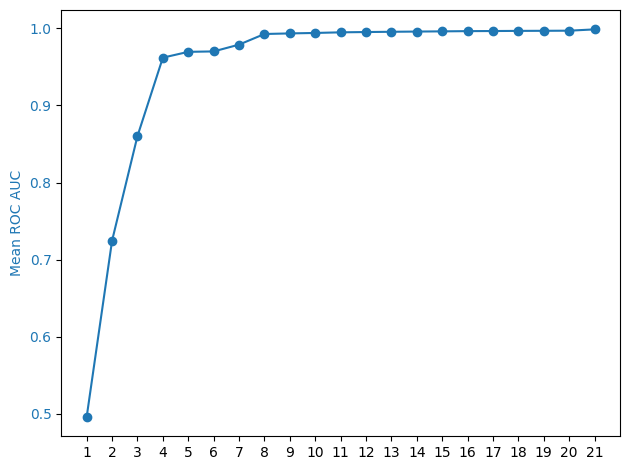

In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

stratified_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)

assessment = np.linspace(1, 21, 21).astype(int)
mean_roc_scores = []
missing_values = []
for i in assessment:
    test_df = df_trad_ehr.copy()
    test_df = test_df[test_df['Assmnt'] <= i]
    # add missing values for each variable up unitl that assessment
    missing_values.append((test_df.isna().sum() / len(test_df)) * 100)
    X = test_df.drop(['fclinra08'], axis=1).fillna(test_df.mean())
    y = test_df['fclinra08']
    roc_scores = []
    for train_index, test_index in stratified_k_fold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        roc_scores.append(roc_auc_score(y_test, y_pred))
    mean_roc_scores.append(np.mean(roc_scores))

# plot missing values but have the y-axis on the right side
fig, ax1 = plt.subplots()
ax1.plot(assessment, mean_roc_scores, color='tab:blue')
ax1.plot(assessment, mean_roc_scores, 'o')
ax1.set_ylabel('Mean ROC AUC', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
fig.tight_layout()
plt.xticks(assessment)

# save as svg
plt.savefig('./images/performance_assessment.svg', format='svg', dpi=1200)
plt.savefig('./images/performance_assessment.png', format='png', dpi=1200)

In [96]:
# we only take values up until assessment 8 (first week)
df_subset = df_trad_ehr.copy()
df_subset = df_subset[df_subset['Assmnt'] <= 8]
# drop assmnt
df_subset = df_subset.drop(columns=['Assmnt'])

# Deal with formatting

In [97]:
# dem05, dem08, 


harvard_formatting = df_subset.copy()

# subtract 1 from all of these variables and swap the first two values
variables_starting_at_one_and_reversed = ['bclinra09', 'bclinra10', 'bclinra16', 'Elig03', ]
for variable in variables_starting_at_one_and_reversed:
    harvard_formatting[variable] = harvard_formatting[variable].apply(lambda x: x-1)
    harvard_formatting[variable] = harvard_formatting[variable].apply(lambda x: 1 if x == 0 else (0 if x == 1 else x))

# subtract 1 from all of these variables
variables_starting_at_one = ['dem03']
for variable in variables_starting_at_one:
    harvard_formatting[variable] = harvard_formatting[variable].apply(lambda x: x-1)

# just swap the first two values
variables_reversed = ['bclinpt28', 'bclinpt30', 'bclinpt32', 'bclinpt34', 'bclinpt36','bclinpt38', 'bclinpt40']
for variable in variables_reversed:
    harvard_formatting[variable] = harvard_formatting[variable].apply(lambda x: 1 if x == 0 else (0 if x == 1 else x))

# turn fclinra08 == 2 into 0
harvard_formatting['fclinra08'] = harvard_formatting['fclinra08'].apply(lambda x: 0 if x == 2 else x)

# perform cat code encoding 
variable_to_encode = ['dem05']
for variable in variable_to_encode:
    # sort values by their name
    harvard_formatting[variable] = harvard_formatting[variable].astype('category')
    # transform values into ordinal values starting at 1 depending on their current values
    harvard_formatting[variable] = [var for var in harvard_formatting[variable].cat.codes + 1]

# Outliers

<AxesSubplot: >

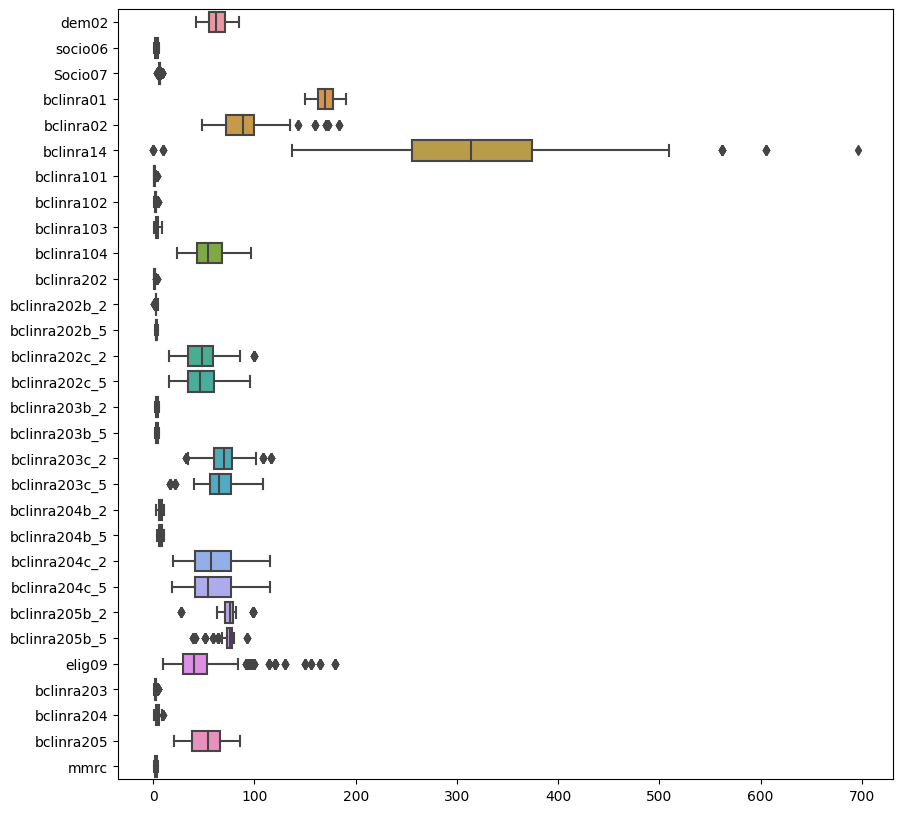

In [98]:
# get all numeric variables (with more than 2 unique values)
numeric_variables = [var for var in harvard_formatting.columns if harvard_formatting[var].dtype != 'object' and len(harvard_formatting[var].unique()) > 5]
df_numeric = harvard_formatting[numeric_variables]

plt.figure(figsize=(10, 10))
# plot the distributions using horizontal boxplots
sns.boxplot(data=df_numeric, orient='h')


Looks like we don't need outlier handling

# Export

In [99]:
# export as csv
harvard_formatting.to_csv('./data/harvard_cleaned.csv', index=False, sep=';', decimal=',')